<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/007(Visualizing_intermediate_steps).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Previous Model

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()


In [4]:

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
validation_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

training_data=train_generator.flow_from_directory("./cats_and_dogs_filtered/train", target_size=(150,150), batch_size=20, class_mode="binary")
validation_data=validation_generator.flow_from_directory("./cats_and_dogs_filtered/validation", target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(150,150,3)),

                           tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),

                           tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),

                           tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=512, activation="relu"),
                           tf.keras.layers.Dense(units=1, activation="sigmoid")
                           ])
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])
history=model.fit(training_data, epochs=8, validation_data=validation_data, verbose=1)

####Visualizing Intermediate Outputs

In [9]:
layers=model.layers
outputs=[layer.output for layer in layers]

In [23]:
outputs

[<KerasTensor: shape=(None, 148, 148, 16) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 74, 74, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 72, 72, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 36, 36, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 34, 34, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 17, 17, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 18496) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]

In [11]:
intermediate_model=tf.keras.models.Model(inputs=model.input, outputs=outputs)

In [15]:
#Loading Image
img=tf.keras.utils.load_img("./cat.jpg", target_size=(150,150))
#Convert to array
img_arr=tf.keras.utils.img_to_array(img)
#Expanding Dimension
f_img=np.expand_dims(img_arr, axis=0)
f_img.shape

(1, 150, 150, 3)

In [22]:
prediction=intermediate_model.predict(f_img)
layers_outputs=prediction
layer_1_ouput=layers_outputs[0]
layer_1_ouput.shape #First Layers has 16 filters thats why we got 16


1/1 [==============================] - 0s 18ms/step


(1, 148, 148, 16)

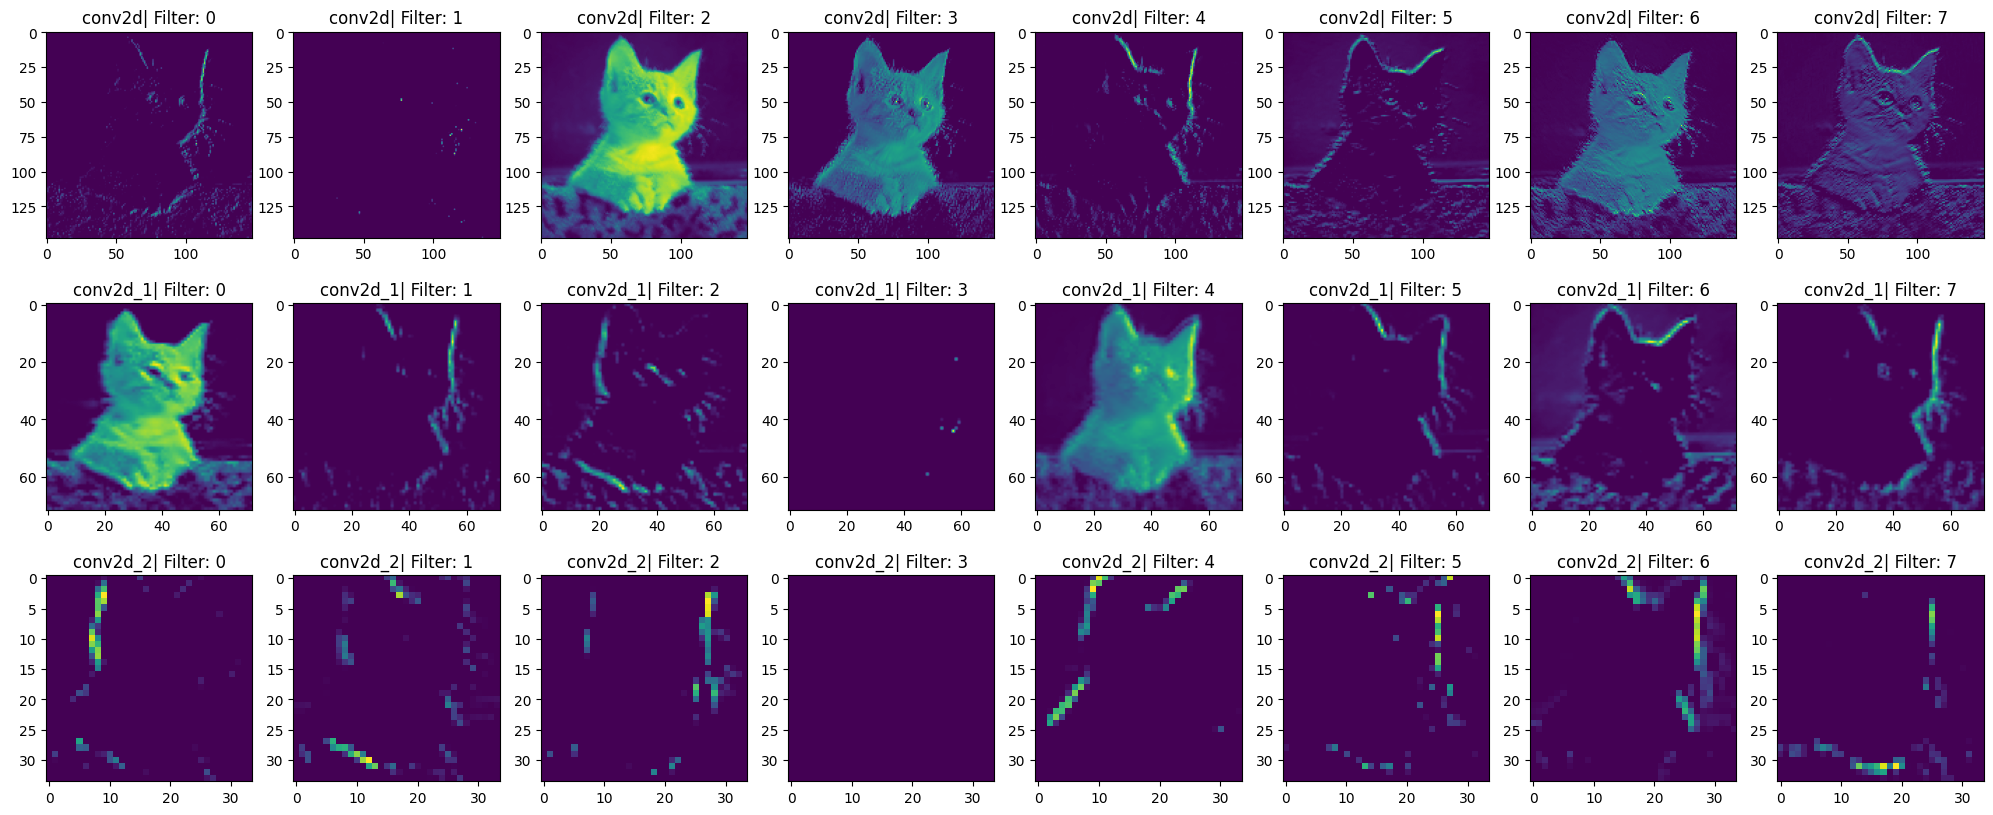

In [37]:
#Visualizing the outputs of first 8 filters of all conv2D layers
rows=3
cols=8
rows_counter=0
fig, axis=plt.subplots(ncols=cols, nrows=rows, figsize=(25, 10))
for name, output in zip(layers, layers_outputs):
  if(name.name=="conv2d" or name.name=="conv2d_1" or name.name=="conv2d_2"):
    for filter in range(cols):
      axis[rows_counter, filter].set_title(name.name+"| Filter: "+str(filter))
      axis[rows_counter, filter].imshow(output[0,:,:,filter])


    rows_counter+=1